In [96]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cairocffi as cairo
import io
from scipy.ndimage import imread
from scipy.misc import imresize
import json
import gzip
import tarfile
import random
from hangul_utils import check_syllable, split_syllable_char, split_syllables, join_jamos_char
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'
plt.rcParams["font.family"] = "NanumGothic"

print("packs loaded")
%connect_info

packs loaded
{
  "stdin_port": 51634,
  "ip": "127.0.0.1",
  "transport": "tcp",
  "control_port": 57580,
  "iopub_port": 59089,
  "signature_scheme": "hmac-sha256",
  "hb_port": 55326,
  "kernel_name": "",
  "key": "b8967e8a-a470-4187-bccc-d42881abaef7",
  "shell_port": 43846
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-6c39a824-2c15-431a-adc2-8ccf531f4668.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [142]:
import ch_recog
ch_recog.init_session()
ch_recog.load_ckpt("ch_recog_model_only_valid.ckpt")

session initialized


NotFoundError: Tensor name "beta2_power_1" not found in checkpoint files ch_recog_model_only_valid.ckpt
	 [[Node: save_14/restore_slice_147 = RestoreSlice[dt=DT_FLOAT, preferred_shard=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_14/Const_0, save_14/restore_slice_147/tensor_name, save_14/restore_slice_147/shape_and_slice)]]
Caused by op 'save_14/restore_slice_147', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-142-24923db2cb37>", line 3, in <module>
    ch_recog.load_ckpt("ch_recog_model_only_valid.ckpt")
  File "/home/north/project/KoreanOCR/ch_recog/__init__.py", line 137, in load_ckpt
    saver = tf.train.Saver()
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 861, in __init__
    restore_sequentially=restore_sequentially)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 519, in build
    filename_tensor, vars_to_save, restore_sequentially, reshape)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 272, in _AddRestoreOps
    values = self.restore_op(filename_tensor, vs, preferred_shard)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 187, in restore_op
    preferred_shard=preferred_shard)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/ops/io_ops.py", line 203, in _restore_slice
    preferred_shard, name=name)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 359, in _restore_slice
    preferred_shard=preferred_shard, name=name)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2317, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1239, in __init__
    self._traceback = _extract_stack()


In [127]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Not RGB!")
        return rgb

def write_line(text):
    WIDTH, HEIGHT = 480, 100
    surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
    ctx = cairo.Context (surface)
    ctx.set_font_size(40)
    ctx.set_source_rgb(0, 0, 0)
    ctx.paint()
    ctx.set_source_rgb(1, 1, 1)
    ctx.select_font_face("NanumGothic", cairo.FONT_SLANT_NORMAL,
                cairo.FONT_WEIGHT_NORMAL)
    ctx.move_to(20,40)
    ctx.show_text(text)
    fb = io.BytesIO()
    surface.write_to_png (fb)
    mat = imread(fb)
    fb.close()
    return rgb2gray(mat)

def get_one_pred(input_mat):
    pred_cho, pred_jung, pred_jong, pred_en = sess.run(
        (h_cho, h_jung, h_jong, h_en), feed_dict={X: [input_mat], keep_prob: 1})
    return pred_cho[0], pred_jung[0], pred_jong[0], pred_en[0]

def analyze_ch(input_mat):
    pred_cho, pred_jung, pred_jong, pred_en = get_one_pred(imresize(input_mat, [32, 32]))
    invalid_cho = np.argmax(pred_cho) == len(ko_chset_cho)
    invalid_jung = np.argmax(pred_jung) == len(ko_chset_jung)
    invalid_jong = np.argmax(pred_jong) == len(ko_chset_jong)
    invalid_en = np.argmax(pred_en) == len(en_chset)
    invalid_ko = (invalid_cho and (invalid_jung or invalid_jong)) or (invalid_jung and invalid_jong)
    
    if invalid_en and invalid_ko:
        return ""
    if invalid_ko:
        return en_chset[np.argmax(pred_en)]
    if invalid_en:
        if invalid_cho:
            pred_cho[np.argmax(pred_cho)] = 0
        if invalid_jung:
            pred_jung[np.argmax(pred_jung)] = 0
        if invalid_jong:
            pred_jong[np.argmax(pred_jong)] = 0
        cho = ko_chset_cho[np.argmax(pred_cho)]
        jung = ko_chset_jung[np.argmax(pred_jung)]
        jong = ko_chset_jong[np.argmax(pred_jong)]
        if jong == 'X':
            jong = None
        return join_jamos_char(cho, jung, jong)
    
def build_pred_chart(text):
    mat = write_line(text)

    plt.figure(figsize=(12,12))
    plt.yticks(())
    plt.imshow(mat)

    for i in range(0, 440):
        if i % 5 == 0:
            plt.annotate(analyze_ch(mat[:50, i:50+i]), xy=(i+22, (i%25)*2+50))
            #print("%3d: '%s'" % (i, ))
            
    plt.figure()
    for i in range(9):
        plt.subplot(1,9,i+1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(mat[:50, i*50:50+i*50])

print("function loaded")

function loaded


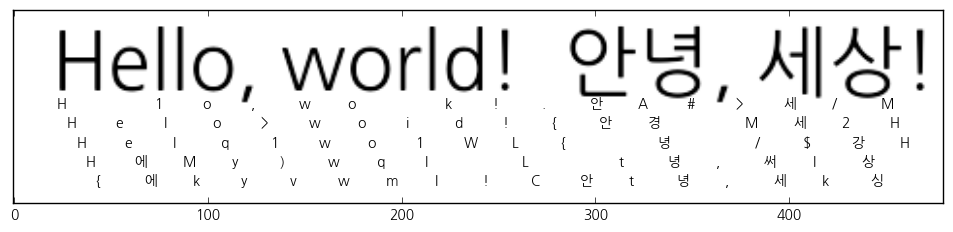

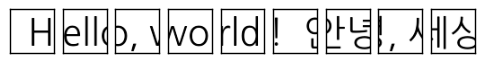

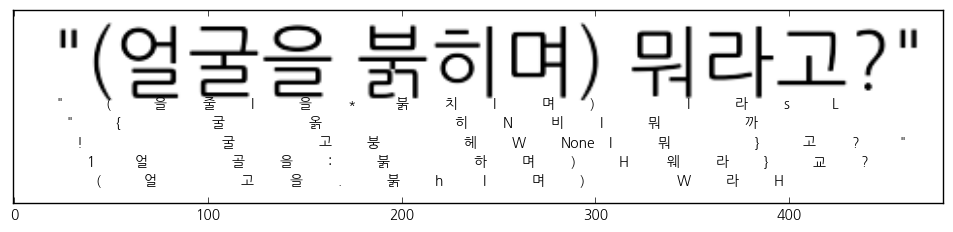

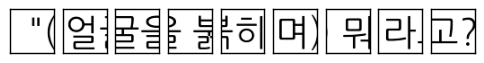

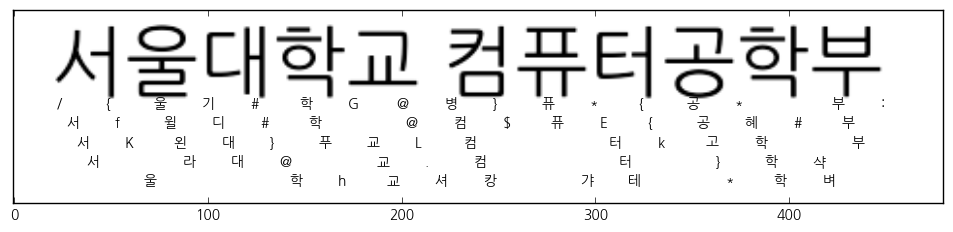

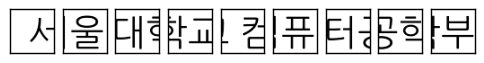

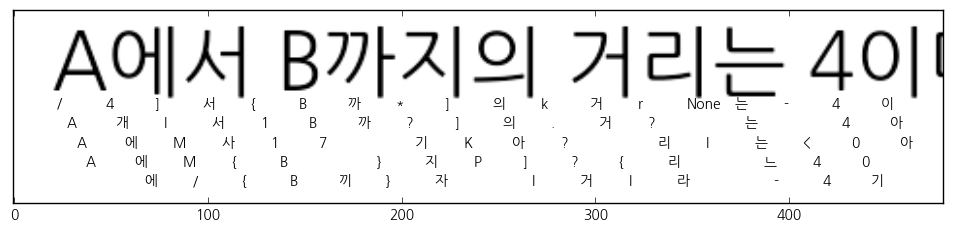

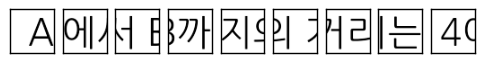

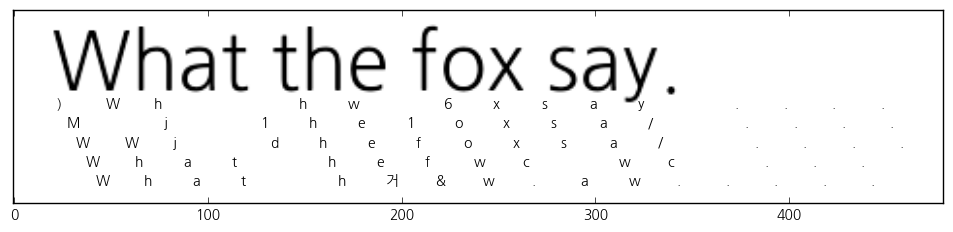

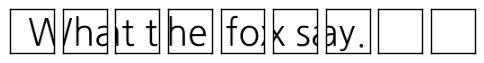

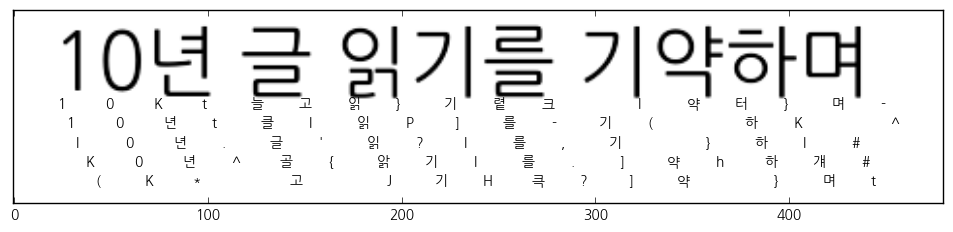

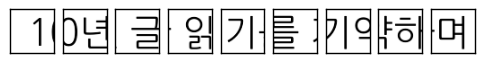

In [128]:
build_pred_chart("Hello, world!  안녕, 세상!")
build_pred_chart("\"(얼굴을 붉히며) 뭐라고?\"")
build_pred_chart("서울대학교 컴퓨터공학부")
build_pred_chart("A에서 B까지의 거리는 4이다.")
build_pred_chart("What the fox say.")
build_pred_chart("10년 글 읽기를 기약하며")